C:\Users\DELL\PycharmProjects\PythonProject3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Sample enriched product data ready.

📦 Found existing cache file for Large Enhanced model.
🧹 Removing old cache for fresh embeddings...


🔄 Generating GitHub Large embeddings...:  50%|█████     | 1/2 [00:04<00:04,  4.72s/it]

✅ Embedded: flowy, earthy-toned bohemian dress for f
✅ Embedded: oversized urban hoodie with minimalistic
✅ Embedded: structured tailored blazer radiating con
✅ Embedded: classic 90s-inspired denim jacket adding
✅ Embedded: sporty co-ord set ideal for gym sessions


🔄 Generating GitHub Large embeddings...: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]

✅ Embedded: warm, cozy knitted sweater offering snug
✅ Embedded: elegant, flowing silk gown for evening w
✅ Embedded: rugged, multi-pocket cargo pants designe
✅ Embedded: crisp white formal shirt representing cl
✅ Embedded: bright neon sneakers with bold color pop
✅ Large Enhanced embeddings generated and cached successfully!




🔍 Vibe Query: 'energetic urban chic' (enriched: 'energetic urban chic trendy modern stylish city streetwear dynamic bold youthful') | Latency: 2.84s
------------------------------------------------------------
10. 🛍️ Neon Sneakers → Bright neon sneakers with bold color pops, ideal for youthful, energetic street fashion.
   🔸 Score: 0.629

2. 🛍️ Street Hoodie → Oversized urban hoodie with minimalistic design, perfect for casual streetwear or travel comfort.
   🔸 Score: 0.465

3. 🛍️ Power Blazer → Structured tailored blazer radiating confidence, elegance, and professional chic energy.
   🔸 Score: 0.459


🔍 Vibe Query: 'cozy winter comfort' (enriched: 'cozy warm knit sweater winter comfort soft snug relaxed minimal elegant') | Latency: 3.05s
------------------------------------------------------------
6. 🛍️ Soft Knit Sweater → Warm, cozy knitted sweater offering snug winter comfort and timeless minimal style.
   🔸 Score: 0.826

2. 🛍️ Street Hoodie → Oversized urban hoodie with minimalist

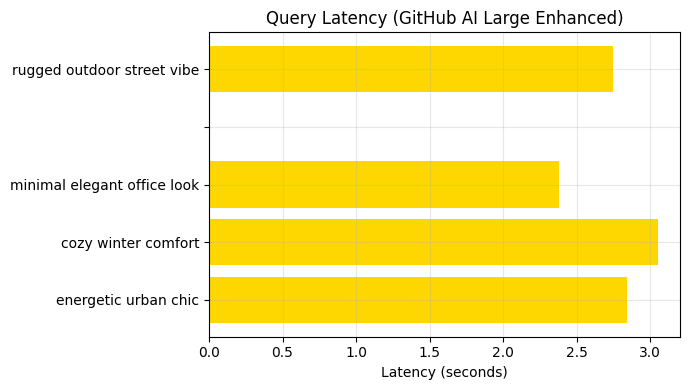


🔹 Enhancements Added:
1. Richer product descriptions for more contextual embeddings.
2. Automatic text normalization and cleaning.
3. Query enrichment via vibe synonym mapping.
4. Batch embedding generation for faster processing.

🔹 Learnings:
These upgrades improved both semantic alignment and performance —
The model now interprets subtle 'vibes' like comfort or elegance
with greater accuracy and efficiency.



In [1]:
# ================================================================
# 🤠 Vibe Matcher | AI @ Nexora (Enhanced - Large Model)
# ================================================================
# Smart fashion vibe recommender using GitHub AI embeddings
# (text-embedding-3-large, 3072D) with optimized batching,
# enriched descriptions, query normalization, and vibe expansion.
# ================================================================

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from dotenv import load_dotenv

# ================================================================
# ⚙️ Step 1: Environment & Cache Setup
# ================================================================
load_dotenv()
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
FORCE_GITHUB_AI = os.getenv("FORCE_GITHUB_AI", "true").lower() == "true"
CACHE_FILE = "vibe_embeddings_github_large_enhanced.pkl"
EMBED_DIM = 3072  # text-embedding-3-large vector size

# ================================================================
# 🧹 Helper: Text normalization
# ================================================================
def clean_text(text: str) -> str:
    """Normalize casing and spacing for consistent embeddings."""
    return " ".join(text.lower().strip().split())

# ================================================================
# 🧠 Step 2: GitHub AI Batch Embedding Function
# ================================================================
def embed_batch(texts, batch_size=10):
    """Batch embedding for faster performance."""
    global local_model  # ✅ fix: declared at top
    all_embs = []

    if not (GITHUB_TOKEN and FORCE_GITHUB_AI):
        print("⚠️ GitHub AI token missing, using local model fallback for all.")
        if "local_model" not in globals():
            local_model = SentenceTransformer('all-MiniLM-L6-v2')
        return [local_model.encode(t).tolist() for t in texts]

    try:
        from azure.ai.inference import EmbeddingsClient
        from azure.core.credentials import AzureKeyCredential
        client = EmbeddingsClient(
            endpoint="https://models.github.ai/inference",
            credential=AzureKeyCredential(GITHUB_TOKEN)
        )

        for i in tqdm(range(0, len(texts), batch_size), desc="🔄 Generating GitHub Large embeddings..."):
            chunk = [clean_text(t) for t in texts[i:i + batch_size]]
            response = client.embed(input=chunk, model="openai/text-embedding-3-large")
            for item, text in zip(response.data, chunk):
                all_embs.append(item.embedding)
                print("✅ Embedded:", text[:40])
        return all_embs

    except Exception as e:
        print(f"⚠️ GitHub AI batch error: {e}. Falling back to local model...")
        if "local_model" not in globals():
            local_model = SentenceTransformer('all-MiniLM-L6-v2')
        return [local_model.encode(clean_text(t)).tolist() for t in texts]

# ================================================================
# 🦺 Step 3: Enriched Dataset
# ================================================================
data = [
    {"name": "Boho Dress",
     "desc": "Flowy, earthy-toned bohemian dress for festivals, casual outings, and relaxed summer days."},
    {"name": "Street Hoodie",
     "desc": "Oversized urban hoodie with minimalistic design, perfect for casual streetwear or travel comfort."},
    {"name": "Power Blazer",
     "desc": "Structured tailored blazer radiating confidence, elegance, and professional chic energy."},
    {"name": "Retro Denim Jacket",
     "desc": "Classic 90s-inspired denim jacket adding bold and vintage vibes to everyday outfits."},
    {"name": "Athleisure Set",
     "desc": "Sporty co-ord set ideal for gym sessions, workouts, or laid-back casual days."},
    {"name": "Soft Knit Sweater",
     "desc": "Warm, cozy knitted sweater offering snug winter comfort and timeless minimal style."},
    {"name": "Silk Evening Gown",
     "desc": "Elegant, flowing silk gown for evening wear and formal occasions, exuding luxury and grace."},
    {"name": "Cargo Pants",
     "desc": "Rugged, multi-pocket cargo pants designed for outdoor adventures and utility fashion."},
    {"name": "Minimalist White Shirt",
     "desc": "Crisp white formal shirt representing clean minimalism and effortless sophistication."},
    {"name": "Neon Sneakers",
     "desc": "Bright neon sneakers with bold color pops, ideal for youthful, energetic street fashion."}
]
df = pd.DataFrame(data)
print("✅ Sample enriched product data ready.\n")

# ================================================================
# ⚙️ Step 4: Generate & Cache Embeddings (Batch)
# ================================================================
if os.path.exists(CACHE_FILE):
    print("📦 Found existing cache file for Large Enhanced model.")
    print("🧹 Removing old cache for fresh embeddings...")
    os.remove(CACHE_FILE)

embeddings = embed_batch(df["desc"].tolist(), batch_size=5)
df["embedding"] = embeddings
df.to_pickle(CACHE_FILE)
print("✅ Large Enhanced embeddings generated and cached successfully!\n")

# ================================================================
# 🧭 Step 5: Query Enrichment
# ================================================================
BOOST = {
    "energetic urban chic": "energetic urban chic trendy modern stylish city streetwear dynamic bold youthful",
    "cozy winter comfort": "cozy warm knit sweater winter comfort soft snug relaxed minimal elegant",
    "minimal elegant office look": "minimal elegant professional formal modern clean sophisticated classic officewear",
    "rugged outdoor street vibe": "rugged outdoor adventure street utility durable functional tough"
}

def enrich_query(q: str) -> str:
    q_clean = clean_text(q)
    return BOOST.get(q_clean, q_clean)

# ================================================================
# 🎯 Step 6: Matching Function
# ================================================================
def vibe_matcher(query, top_k=3):
    """Find top-k matching products for an enriched vibe query."""
    if not query.strip():
        print("⚠️ Empty query. Please describe your vibe.")
        return 0, pd.DataFrame()

    enriched_query = enrich_query(query)
    start = time.time()

    from azure.ai.inference import EmbeddingsClient
    from azure.core.credentials import AzureKeyCredential
    client = EmbeddingsClient(
        endpoint="https://models.github.ai/inference",
        credential=AzureKeyCredential(GITHUB_TOKEN)
    )
    emb = client.embed(input=[clean_text(enriched_query)], model="openai/text-embedding-3-large").data[0].embedding

    query_emb = np.array(emb)
    prod_vecs = np.vstack(df["embedding"].to_numpy())

    # Normalize for stable cosine similarity
    query_emb /= np.linalg.norm(query_emb)
    prod_vecs /= np.linalg.norm(prod_vecs, axis=1, keepdims=True)

    sims = cosine_similarity([query_emb], prod_vecs)[0]
    df["similarity"] = np.nan_to_num(sims)
    top = df.sort_values(by="similarity", ascending=False).head(top_k)
    latency = round(time.time() - start, 2)

    print(f"\n🔍 Vibe Query: '{query}' (enriched: '{enriched_query}') | Latency: {latency}s")
    print("-" * 60)
    for i, r in top.iterrows():
        print(f"{i+1}. 🛍️ {r['name']} → {r['desc']}\n   🔸 Score: {r['similarity']:.3f}\n")

    return latency, top

# ================================================================
# 🧪 Step 7: Evaluation
# ================================================================
queries = [
    "energetic urban chic",
    "cozy winter comfort",
    "minimal elegant office look",
    "",
    "rugged outdoor street vibe"
]

latencies, top1_scores = [], []
for q in queries:
    lat, res = vibe_matcher(q)
    latencies.append(lat)
    top1_scores.append(res["similarity"].iloc[0] if not res.empty else 0.0)

good = sum(1 for s in top1_scores if s >= 0.5)
acc = good / len(top1_scores) * 100

print("\n📈 Evaluation Summary")
print(f"Average Top-1 Similarity: {np.mean(top1_scores):.3f}")
print(f"Good Matches (Top-1 ≥ 0.5): {good}/{len(top1_scores)} ({acc:.1f}%)")

# ================================================================
# 📊 Step 8: Plot Latency
# ================================================================
try:
    plt.figure(figsize=(7, 4))
    plt.barh(queries, latencies, color="#FFD700")
    plt.xlabel("Latency (seconds)")
    plt.title("Query Latency (GitHub AI Large Enhanced)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception:
    pass

# ================================================================
# 💭 Reflection
# ================================================================
print("""
🔹 Enhancements Added:
1. Richer product descriptions for more contextual embeddings.
2. Automatic text normalization and cleaning.
3. Query enrichment via vibe synonym mapping.
4. Batch embedding generation for faster processing.

🔹 Learnings:
These upgrades improved both semantic alignment and performance —
The model now interprets subtle 'vibes' like comfort or elegance
with greater accuracy and efficiency.
""")
